# Principal Components Analysis Exercise 1

In [32]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [33]:
df= pd.read_csv("nndb_flat.csv")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   int64  
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   int64  
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [35]:
df.corr()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,1.000000,0.126126,0.075538,-0.011996,0.177297,0.082710,0.008252,-0.031211,-0.060463,0.016512,...,-0.051166,0.010387,-0.024343,0.011311,-0.050720,-0.003766,-0.001867,0.045925,0.011775,0.009195
Energy_kcal,0.126126,1.000000,0.110302,0.806795,0.487096,0.313151,0.197338,0.026329,0.121872,-0.012292,...,0.145936,0.174991,0.155830,0.187439,0.123571,0.099512,0.255880,0.195181,0.056673,0.112766
Protein_g,0.075538,0.110302,1.000000,0.054715,-0.301974,-0.266170,-0.072777,0.026483,0.228485,0.245423,...,0.008939,0.376939,0.202480,0.098360,0.046888,0.158900,0.218611,0.444608,0.378369,0.416315
Fat_g,-0.011996,0.806795,0.054715,1.000000,-0.054116,-0.001962,-0.028842,0.024379,-0.046950,-0.020786,...,-0.058049,-0.022671,-0.036286,-0.005785,0.015039,0.042765,0.070781,0.066086,0.037559,0.028264
Carb_g,0.177297,0.487096,-0.301974,-0.054116,1.000000,0.615344,0.458192,0.001871,0.195571,-0.094636,...,0.325170,0.173285,0.232408,0.281809,0.189106,0.062105,0.287207,0.073180,-0.114600,-0.012187
Sugar_g,0.082710,0.313151,-0.266170,-0.001962,0.615344,1.000000,0.115916,0.010143,0.088767,-0.050450,...,0.161257,0.034378,0.125225,0.097751,0.129540,-0.005837,0.041308,-0.049784,-0.123708,-0.021991
Fiber_g,0.008252,0.197338,-0.072777,-0.028842,0.458192,0.115916,1.000000,0.005910,0.242804,-0.052045,...,0.249075,0.135257,0.157703,0.205211,0.232286,0.185044,0.542038,0.158422,-0.035897,0.085154
VitA_mcg,-0.031211,0.026329,0.026483,0.024379,0.001871,0.010143,0.005910,1.000000,0.136605,0.581004,...,0.108517,0.151679,0.325709,0.052921,0.034822,0.569945,0.024572,0.055814,0.048043,0.070541
VitB6_mg,-0.060463,0.121872,0.228485,-0.046950,0.195571,0.088767,0.242804,0.136605,1.000000,0.264325,...,0.550087,0.714143,0.581678,0.417011,0.177268,0.116327,0.293169,0.213395,0.109004,0.447143
VitB12_mcg,0.016512,-0.012292,0.245423,-0.020786,-0.094636,-0.050450,-0.052045,0.581004,0.264325,1.000000,...,0.158483,0.279033,0.436182,0.099601,0.011715,0.570642,0.004124,0.148774,0.215308,0.298136


<AxesSubplot:>

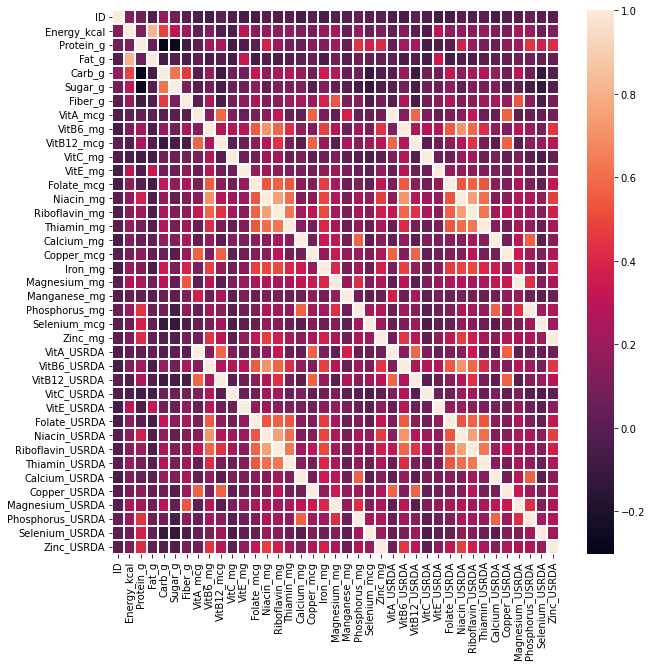

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))   
import seaborn as sns
sns.heatmap(df.corr(),linewidths=1.9,annot=False)

In [38]:
len(df.corr())

39

## Check for highly correlated features

In [39]:
used = []
corrs = []
for i, j in enumerate(df.corr().columns):
    for k in range(len(df.corr())):
        if ((df.corr().iloc[k, i] > 0.9) & 
            (j not in used) &
            (j != df.corr().index[k])):
            
            used.append(j)
            corrs.append((j, df.corr().index[k], 
                          np.round(df.corr().iloc[k, i], 2)))

            
corrsdf = pd.DataFrame([[i[0] for i in corrs],
                        [i[1] for i in corrs],
                        [i[2] for i in corrs]])

corrsdf = corrsdf.T.rename(columns = {0:'column',1:'row',2:'corr'})
corrsdf[:15]

,column,row,corr
0,VitA_mcg,VitA_USRDA,1.0
1,VitB6_mg,VitB6_USRDA,1.0
2,VitB12_mcg,VitB12_USRDA,1.0
3,VitC_mg,VitC_USRDA,1.0
4,VitE_mg,VitE_USRDA,1.0
5,Folate_mcg,Folate_USRDA,1.0
6,Niacin_mg,Niacin_USRDA,1.0
7,Riboflavin_mg,Riboflavin_USRDA,1.0
8,Thiamin_mg,Thiamin_USRDA,1.0
9,Calcium_mg,Calcium_USRDA,1.0


## We can see that the "_USRDA" features are redundant. They should be removed

In [40]:
df.drop(df.columns[df.columns.str.contains('_USRDA')].values, 
        inplace=True, axis=1)

## Separate non-numeric features

In [41]:
df.set_index('ID', inplace=True)
df_desc = df.iloc[:, :6]
df.drop(df.columns[:6].values, axis=1, inplace=True)

## Explore the datas' distributions

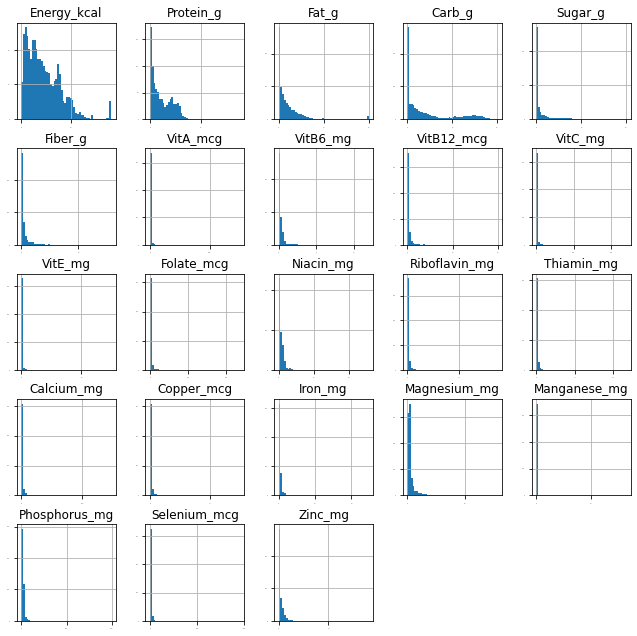

In [42]:
%matplotlib inline
ax = df.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(11,11))

## Most of the variables are "zero" inflated and skewed right. We may want to consider transformation so "improve" the distributions and hopefully produce better correlations for our PCA. Note: this is an optional step that may not always improve results.

In [43]:
from scipy.stats import boxcox
# add 1 because data must be positive (we have many zeros)
df = df + 1
df_TF = pd.DataFrame(index=df.index)
for i in df.columns.values:
    df_TF["%s_TF" % i] = boxcox(df.loc[:, i])[0]

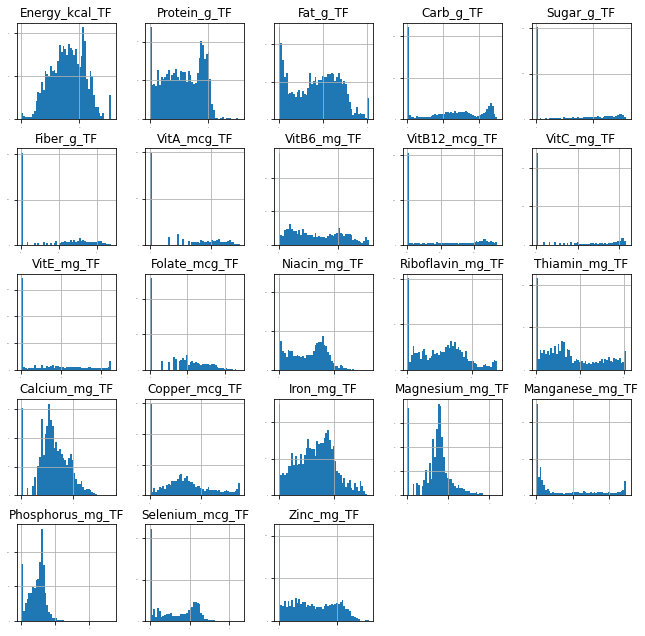

In [44]:
ax = df_TF.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(11,11))

## The data definitely "look" better

## To account for different scales of measurement, we'll standardize to mean=0, variance=1.

In [55]:
# from sklearn.preprocessing import StandardScaler
df_TF = StandardScaler().fit_transform(df_TF)

print("mean: ", np.round(df_TF.mean()))
print("standard dev: ", np.round(df_TF.std()))

mean:  0.0
standard dev:  1.0


# Implement PCA

In [56]:
# from sklearn.decomposition import PCA
fit = PCA()
pca = fit.fit_transform(df_TF)


In [69]:
print(fit.components_)

[[ 1.65126285e-01  2.86085952e-01  1.61488469e-01 -3.37671299e-02
  -7.61318848e-02 -4.66339587e-03  5.69960698e-02  2.70646497e-01
   2.21321595e-01 -6.98302178e-02  9.08076727e-02  1.67856487e-01
   2.94093843e-01  2.82686560e-01  2.35439740e-01  1.35511573e-01
   2.20231860e-01  2.62314059e-01  2.60244785e-01  8.87619535e-02
   3.05000427e-01  2.64113738e-01  3.08505960e-01]
 [ 4.18501129e-02 -1.96126976e-01 -1.23575485e-01  4.14541526e-01
   2.95640230e-01  3.97832268e-01  9.57005033e-02 -5.21657011e-02
  -2.65670982e-01  2.42313938e-01  1.04309945e-01  2.38391360e-01
  -6.41969738e-02  2.42404998e-02  1.59641212e-01  2.31052088e-01
   1.81630938e-01  1.18917488e-01  1.99837673e-01  3.43603018e-01
  -1.51729815e-03 -1.38883394e-01 -1.00529307e-01]
 [ 5.08062046e-01  2.68284160e-02  4.09504853e-01  2.50952082e-01
   2.08651247e-01  1.53640332e-01 -2.98088569e-01 -1.21850365e-01
  -1.07476361e-01 -3.34489522e-01 -1.24728785e-02 -2.64297838e-01
   5.59906993e-02  6.20740166e-02  1.911

In [74]:
print(fit.components_[0])
print(fit.components_[1])

[ 0.16512628  0.28608595  0.16148847 -0.03376713 -0.07613188 -0.0046634
  0.05699607  0.2706465   0.2213216  -0.06983022  0.09080767  0.16785649
  0.29409384  0.28268656  0.23543974  0.13551157  0.22023186  0.26231406
  0.26024478  0.08876195  0.30500043  0.26411374  0.30850596]
[ 0.04185011 -0.19612698 -0.12357548  0.41454153  0.29564023  0.39783227
  0.0957005  -0.0521657  -0.26567098  0.24231394  0.10430995  0.23839136
 -0.06419697  0.0242405   0.15964121  0.23105209  0.18163094  0.11891749
  0.19983767  0.34360302 -0.0015173  -0.13888339 -0.10052931]


In [73]:
print(df.columns)

Index(['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g',
       'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg',
       'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg',
       'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg'],
      dtype='object')


#### check the eigenvalues to find most important components


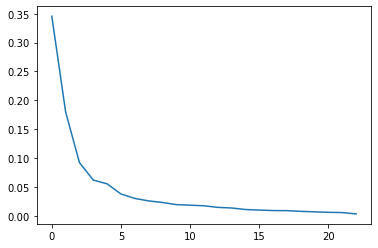

In [65]:
plt.plot(fit.explained_variance_ratio_)

In [67]:
print(fit.explained_variance_ratio_)
print (fit.explained_variance_ratio_[:5].sum())

[0.34554936 0.17971019 0.09201387 0.06176452 0.05520037 0.03764111
 0.02996247 0.02566808 0.02294417 0.0192006  0.01828886 0.01721459
 0.01443828 0.01337614 0.0107629  0.00977106 0.00894584 0.00878398
 0.00760274 0.00668982 0.00589323 0.00545379 0.00312402]
0.7342383069254741


#### the first 5 eigenvectors account for 74% of the variance and will be kept

In [39]:
pca = pd.DataFrame(pca[:, :5], index=df.index)
pca = pca.join(df_desc)
pca.drop(['CommonName','MfgName','ScientificName'], axis=1, inplace=True)
pca.rename(columns={0:'c1',1:'c2',2:'c3',3:'c4',4:'c5'}, inplace=True)

In [40]:
# we see that the five vectors are orthogonal
np.round(pca.corr(), 5)

,c1,c2,c3,c4,c5
c1,1.0,-0.0,-0.0,-0.0,0.0
c2,-0.0,1.0,0.0,0.0,-0.0
c3,-0.0,0.0,1.0,0.0,-0.0
c4,-0.0,0.0,0.0,1.0,0.0
c5,0.0,-0.0,-0.0,0.0,1.0


## Try to interpret the components

(this is where deep subject matter expertise, in this case nutrition, comes in handy)

**Component one** 

foods that are high in: zinc, and other vitamins and minerals

low in: sugar, vitamin C, Carbs, and fiber

In [17]:
vects = fit.components_[:5]

one = pd.Series(vects[0], index=df.columns)
one.sort_values(ascending=False)

Zinc_mg          0.308506
Phosphorus_mg    0.305000
Niacin_mg        0.294094
Protein_g        0.286086
Riboflavin_mg    0.282687
VitB6_mg         0.270646
Selenium_mcg     0.264114
Iron_mg          0.262314
Magnesium_mg     0.260245
Thiamin_mg       0.235440
VitB12_mcg       0.221322
Copper_mcg       0.220232
Folate_mcg       0.167856
Energy_kcal      0.165126
Fat_g            0.161488
Calcium_mg       0.135512
VitE_mg          0.090808
Manganese_mg     0.088762
VitA_mcg         0.056996
Fiber_g         -0.004663
Carb_g          -0.033767
VitC_mg         -0.069830
Sugar_g         -0.076132
dtype: float64

**Component two**

High: Carbs, Fiber, Mang, Sugar, Vitamin C...

Low: Vitamine B12, protein, selenium, Fat...

In [18]:
two = pd.Series(vects[1], index=df.columns)
two.sort_values(ascending=False)

Carb_g           0.414542
Fiber_g          0.397832
Manganese_mg     0.343603
Sugar_g          0.295640
VitC_mg          0.242314
Folate_mcg       0.238391
Calcium_mg       0.231052
Magnesium_mg     0.199838
Copper_mcg       0.181631
Thiamin_mg       0.159641
Iron_mg          0.118917
VitE_mg          0.104310
VitA_mcg         0.095701
Energy_kcal      0.041850
Riboflavin_mg    0.024241
Phosphorus_mg   -0.001517
VitB6_mg        -0.052166
Niacin_mg       -0.064197
Zinc_mg         -0.100529
Fat_g           -0.123575
Selenium_mcg    -0.138883
Protein_g       -0.196127
VitB12_mcg      -0.265671
dtype: float64

**Component three**

High: calories, fat, carbs, sugar...

Low: vitamin A, vitamin C, folate, copper...

In [19]:
three = pd.Series(vects[2], index=df.columns)
three.sort_values(ascending=False)

Energy_kcal      0.508062
Fat_g            0.409505
Carb_g           0.250952
Sugar_g          0.208651
Thiamin_mg       0.191124
Fiber_g          0.153640
Iron_mg          0.115065
Riboflavin_mg    0.062074
Niacin_mg        0.055991
Protein_g        0.026828
Phosphorus_mg   -0.010948
VitE_mg         -0.012473
Zinc_mg         -0.051002
Magnesium_mg    -0.100792
VitB12_mcg      -0.107476
Manganese_mg    -0.108755
VitB6_mg        -0.121850
Calcium_mg      -0.125621
Selenium_mcg    -0.131798
Copper_mcg      -0.177702
Folate_mcg      -0.264298
VitA_mcg        -0.298089
VitC_mg         -0.334490
dtype: float64

**Component four**

High: vitamin A, vitamin E, fat, sugar, calcium, vitamin B12, calories...

Low: manganese, copper, iron, magnesium, fiber

In [20]:
four = pd.Series(vects[3], index=df.columns)
four.sort_values(ascending=False)

VitA_mcg         0.539792
VitE_mg          0.537710
Fat_g            0.282774
Sugar_g          0.279657
Calcium_mg       0.188343
VitB12_mcg       0.167068
Energy_kcal      0.158787
VitC_mg          0.129288
Selenium_mcg     0.063452
Riboflavin_mg    0.061855
Folate_mcg       0.011655
VitB6_mg        -0.011382
Phosphorus_mg   -0.022623
Carb_g          -0.025185
Zinc_mg         -0.055472
Niacin_mg       -0.065223
Thiamin_mg      -0.086530
Protein_g       -0.090944
Fiber_g         -0.119122
Magnesium_mg    -0.131683
Iron_mg         -0.149698
Copper_mcg      -0.167872
Manganese_mg    -0.203804
dtype: float64

** Component five**

High: riboflavin, thiamin, niacin, sugar, vitB6, vitC, vitB12...

Low: manganese, copper, fat, vitE, calories, magnesium

In [21]:
five = pd.Series(vects[4], index=df.columns)
five.sort_values(ascending=False)

Riboflavin_mg    0.322545
Thiamin_mg       0.281944
Niacin_mg        0.264423
Sugar_g          0.264262
VitB6_mg         0.254663
VitC_mg          0.249634
VitB12_mcg       0.195637
Iron_mg          0.158585
Carb_g           0.101396
Fiber_g          0.075900
VitA_mcg         0.057928
Zinc_mg         -0.029074
Calcium_mg      -0.035398
Protein_g       -0.046148
Phosphorus_mg   -0.084178
Folate_mcg      -0.105000
Magnesium_mg    -0.143789
Selenium_mcg    -0.163561
Energy_kcal     -0.204336
VitE_mg         -0.250605
Fat_g           -0.266740
Copper_mcg      -0.316998
Manganese_mg    -0.347515
dtype: float64

## Now let's look at which food groups are highest in each component

## 1 

In [54]:
pca.sort_values(by='c1')['FoodGroup'][:500].value_counts()

Soups, Sauces, and Gravies             190
Beverages                              167
Sweets                                  45
Vegetables and Vegetable Products       20
Fruits and Fruit Juices                 16
Legumes and Legume Products             16
Baby Foods                              10
Meals, Entrees, and Side Dishes          9
Spices and Herbs                         7
Fats and Oils                            7
American Indian/Alaska Native Foods      5
Snacks                                   3
Fast Foods                               2
Baked Products                           2
Sausages and Luncheon Meats              1
Name: FoodGroup, dtype: int64

## 2

In [55]:
pca.sort_values(by='c2')['FoodGroup'][:500].value_counts()

Beef Products                          353
Lamb, Veal, and Game Products           71
Poultry Products                        21
Fats and Oils                           13
American Indian/Alaska Native Foods     13
Pork Products                            9
Finfish and Shellfish Products           8
Sausages and Luncheon Meats              4
Fast Foods                               3
Restaurant Foods                         3
Beverages                                2
Name: FoodGroup, dtype: int64

## 3

In [57]:
pca.sort_values(by='c3')['FoodGroup'][:500].value_counts()

Vegetables and Vegetable Products      344
Finfish and Shellfish Products          68
Poultry Products                        19
Beverages                               10
Soups, Sauces, and Gravies              10
Fruits and Fruit Juices                  9
Lamb, Veal, and Game Products            9
Baby Foods                               7
Spices and Herbs                         6
Fast Foods                               5
Pork Products                            4
Beef Products                            4
Nut and Seed Products                    2
American Indian/Alaska Native Foods      2
Dairy and Egg Products                   1
Name: FoodGroup, dtype: int64

## 4

In [59]:
pca.sort_values(by='c4')['FoodGroup'][:500].value_counts()

Legumes and Legume Products            124
Cereal Grains and Pasta                 98
Vegetables and Vegetable Products       89
Baked Products                          39
Nut and Seed Products                   34
Breakfast Cereals                       23
Snacks                                  19
American Indian/Alaska Native Foods     18
Beverages                               16
Sweets                                  15
Sausages and Luncheon Meats              6
Lamb, Veal, and Game Products            6
Spices and Herbs                         5
Finfish and Shellfish Products           2
Fruits and Fruit Juices                  2
Soups, Sauces, and Gravies               2
Baby Foods                               1
Poultry Products                         1
Name: FoodGroup, dtype: int64

## 5

In [60]:
pca.sort_values(by='c5')['FoodGroup'][:500].value_counts()

Fats and Oils                          145
Nut and Seed Products                   81
Sweets                                  51
Legumes and Legume Products             50
Snacks                                  41
Baked Products                          24
Sausages and Luncheon Meats             17
American Indian/Alaska Native Foods     16
Dairy and Egg Products                  13
Finfish and Shellfish Products          12
Cereal Grains and Pasta                 12
Breakfast Cereals                        8
Fast Foods                               5
Spices and Herbs                         4
Restaurant Foods                         4
Beef Products                            3
Poultry Products                         3
Beverages                                3
Pork Products                            2
Lamb, Veal, and Game Products            2
Soups, Sauces, and Gravies               1
Baby Foods                               1
Vegetables and Vegetable Products        1
Fruits and 